In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import scipy.special as sf
from scipy.stats import norm

In [2]:
dt = 0.1
D = 1.0
L = 10
#xl = 5.0
#xr = 6.0
N = 10
length = 10000

In [3]:
# this is the more realistic model with periodic boundary conditions -L,L
def corrfitPB(t,N,D,w0,L):
    nmax = 20
    n = np.arange(1,nmax)
    nn,tt = np.meshgrid(n,t)
    
    efa = nn*np.pi*w0**2*1j
    an = np.exp(-nn**2*np.pi**2*w0**2/2/L**2)*(sf.erf((L**2-efa)/np.sqrt(2)/L/w0)+sf.erf((L**2+efa)/np.sqrt(2)/L/w0))
    an = np.absolute(an)**2*np.exp(-D*nn**2*np.pi**2*tt/L**2)
    return np.sum(an,axis=1)/N/2

corrfitPB_model=lm.Model(corrfitPB)

In [6]:
N_list=[]
D_list=[]
dN_list=[]
dD_list=[]
for i in range(100):
    intensity = np.load("data/dt01_N10000_"+str(i)+".npy")
    # calculate autocorrelation function
    f = np.fft.rfft(intensity)
    acf = np.fft.irfft(f * np.conjugate(f))
    acf = np.fft.fftshift(acf) / length
    autocorr = acf[int(length/2):]/intensity.mean()**2

    autocorr = autocorr[:1000]-1.0
    t = np.arange(0,autocorr.size)*dt
    
    paramsPB = corrfitPB_model.make_params()
    paramsPB['w0'].set(value=1,vary=False)
    paramsPB['N'].set(value=20,vary=True)
    paramsPB['D'].set(value=D,vary=True)
    paramsPB['L'].set(value=L,vary=False)

    resultPB = corrfitPB_model.fit(t=t,data=autocorr,params=paramsPB)
    
    N_list.append(resultPB.values['N'])
    D_list.append(resultPB.values['D'])
    dN_list.append(resultPB.covar[0][0])
    dD_list.append(resultPB.covar[1][1])
    
    print(resultPB.fit_report())
    

[[Model]]
    Model(corrfitPB)
[[Fit Statistics]]
    # function evals   = 25
    # data points      = 1000
    # variables        = 2
    chi-square         = 0.861
    reduced chi-square = 0.001
    Akaike info crit   = -7050.989
    Bayesian info crit = -7041.174
[[Variables]]
    N:    8.59636178 +/- 0.182871 (2.13%) (init= 20)
    D:    1.06573659 +/- 0.036296 (3.41%) (init= 1)
    w0:   1 (fixed)
    L:    10 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(N, D)                      = -0.775 

[[Model]]
    Model(corrfitPB)
[[Fit Statistics]]
    # function evals   = 25
    # data points      = 1000
    # variables        = 2
    chi-square         = 0.213
    reduced chi-square = 0.000
    Akaike info crit   = -8450.433
    Bayesian info crit = -8440.617
[[Variables]]
    N:    10.0449216 +/- 0.146972 (1.46%) (init= 20)
    D:    1.55516871 +/- 0.036695 (2.36%) (init= 1)
    w0:   1 (fixed)
    L:    10 (fixed)
[[Correlations]] (unreported correlations are 

In [14]:
N_list=np.array(N_list)
D_list=np.array(D_list)
dN_list=np.sqrt(np.array(dN_list))
dD_list=np.sqrt(np.array(dD_list))

(array([ 0.05935185,  0.2003125 ,  0.3190162 ,  0.06677083,  0.03709491,
         0.03709491,  0.00741898,  0.        ,  0.00741898,  0.00741898]),
 array([  6.42049713,   7.76839105,   9.11628497,  10.46417889,
         11.81207281,  13.15996673,  14.50786065,  15.85575457,
         17.20364849,  18.55154242,  19.89943634]),
 <a list of 10 Patch objects>)

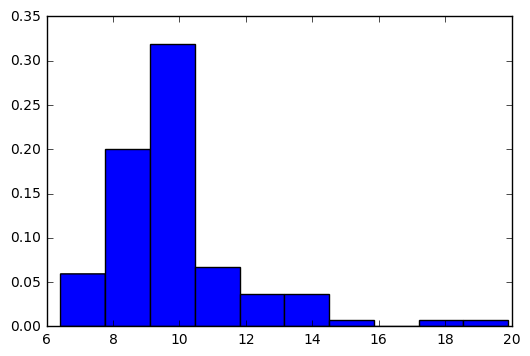

In [16]:
plt.hist(N_list,normed=True)

In [18]:
print(N_list.mean(),N_list.std(),dN_list.mean())

9.94450956544 2.04689742381 0.187442265156


In [19]:
print(D_list.mean(),D_list.std(),dD_list.mean())

1.15300231633 0.407693285759 0.0357962534141
